# Praktikum ML 2 - 2
## Fahrel Gibran Alghany - 24060120130106
### Car Evaluation Dataset

In [45]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import numpy as np

In [46]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

# Mendefinisikan list berisi kolom-kolom dataset
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv(url, names=names)

In [47]:
# Menampilkan 10 data teratas
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [48]:
# Encode categorical value for buying and maint
# Encode from vhigh, high, med, low to 4, 3, 2, 1
data['buying'] = data['buying'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
data['maint'] = data['maint'].map({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})

# Encode categorical value for doors
# Encode from 2, 3, 4, 5more to 2, 3, 4, 5
data['doors'] = data['doors'].map({'2': 2, '3': 3, '4': 4, '5more': 6})

# Encode categorical value for persons
# Encode from 2, 4, more to 2, 4, 6
data['persons'] = data['persons'].map({'2': 2, '4': 4, 'more': 6})

# Encode categorical value for lug_boot
# Encode from small, med, big to 1, 2, 3
data['lug_boot'] = data['lug_boot'].map({'small': 1, 'med': 2, 'big': 3})

# Encode categorical value for safety
# Encode from low, med, high to 1, 2, 3
data['safety'] = data['safety'].map({'low': 1, 'med': 2, 'high': 3})

# Encode categorical value for class
# Encode from unacc, acc, good, vgood to 1, 2, 3, 4
data['class'] = data['class'].map({'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4})

In [49]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
5,4,4,2,2,2,3,1
6,4,4,2,2,3,1,1
7,4,4,2,2,3,2,1
8,4,4,2,2,3,3,1
9,4,4,2,4,1,1,1


In [50]:
# Standardize data
# Standardize data for buying, maint, doors, persons, lug_boot, safety
data['buying'] = (data['buying'] - data['buying'].mean()) / data['buying'].std()
data['maint'] = (data['maint'] - data['maint'].mean()) / data['maint'].std()
data['doors'] = (data['doors'] - data['doors'].mean()) / data['doors'].std()
data['persons'] = (data['persons'] - data['persons'].mean()) / data['persons'].std()
data['lug_boot'] = (data['lug_boot'] - data['lug_boot'].mean()) / data['lug_boot'].std()
data['safety'] = (data['safety'] - data['safety'].mean()) / data['safety'].std()

data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,1.341253,1.341253,-1.182874,-1.22439,-1.22439,-1.22439,1
1,1.341253,1.341253,-1.182874,-1.22439,-1.22439,0.00000,1
2,1.341253,1.341253,-1.182874,-1.22439,-1.22439,1.22439,1
3,1.341253,1.341253,-1.182874,-1.22439,0.00000,-1.22439,1
4,1.341253,1.341253,-1.182874,-1.22439,0.00000,0.00000,1
5,1.341253,1.341253,-1.182874,-1.22439,0.00000,1.22439,1
6,1.341253,1.341253,-1.182874,-1.22439,1.22439,-1.22439,1
7,1.341253,1.341253,-1.182874,-1.22439,1.22439,0.00000,1
8,1.341253,1.341253,-1.182874,-1.22439,1.22439,1.22439,1
9,1.341253,1.341253,-1.182874,0.00000,-1.22439,-1.22439,1


In [52]:
# Get the X and Y
X = data.drop('class', axis=1)
Y = data['class']

# Split the data into train and test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

LR: 0.832849 (0.030769)
KNN: 0.917527 (0.025656)
DT: 0.976864 (0.010586)
NB: 0.698952 (0.036946)
SVM: 0.963101 (0.021332)


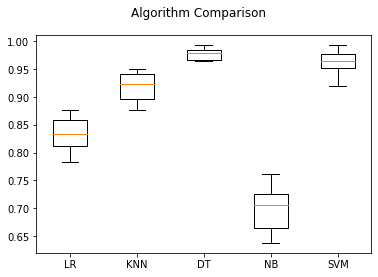

In [55]:
# Create 5 Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create a list of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [60]:
# Choose Decision Tree as the best model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on validation dataset
predictions = model.predict(X_test)


In [63]:
# Evaluate predictions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy\n", accuracy_score(Y_test, predictions))

# Classification Report
print("Classification Report\n", classification_report(Y_test, predictions))

Accuracy
 0.9682080924855492
Classification Report
               precision    recall  f1-score   support

           1       0.98      1.00      0.99       240
           2       0.97      0.89      0.93        79
           3       0.81      1.00      0.89        17
           4       1.00      0.90      0.95        10

    accuracy                           0.97       346
   macro avg       0.94      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346



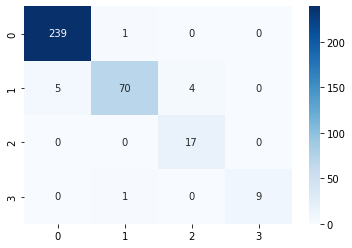

In [65]:
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


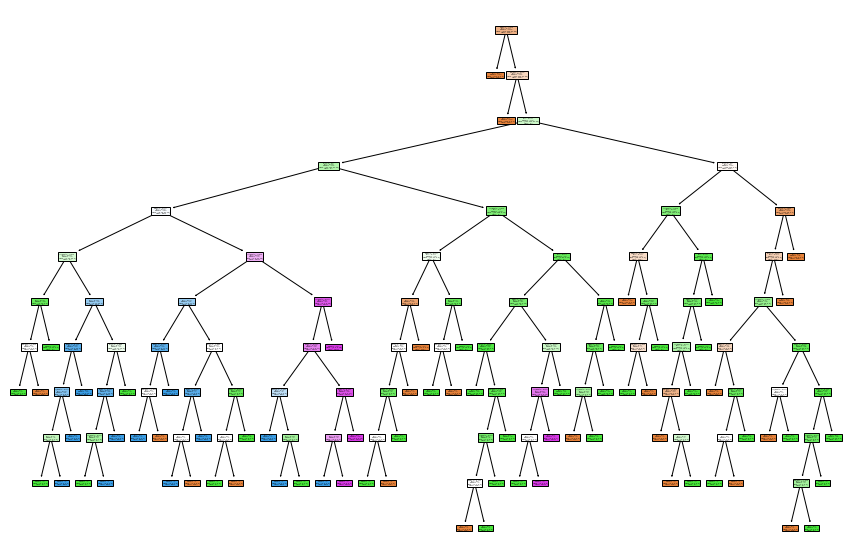

In [66]:
# Plot the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['unacc', 'acc', 'good', 'vgood'], filled=True)
plt.show()